# K-Nearest Neighbours

In [35]:
!pip install scikit-learn

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Let's download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [37]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [38]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

You can easily explore your data using visualization techniques:

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

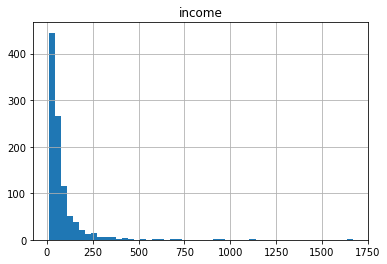

In [39]:
df.hist(column = 'income', bins=50)

### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [40]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
type(X)

numpy.ndarray

In [41]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [42]:
y = df['custcat'].values
type(y)

numpy.ndarray

In [43]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [45]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

### K nearest neighbor (KNN)

### Import library

Classifier implementing the k-nearest neighbors vote.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

Training

Let's start the algorithm with k=4 for now:

In [52]:
k = 4

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:

In [53]:
yhat = knn.predict(X_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

## Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [54]:
from sklearn import metrics

In [55]:
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.5475
Test Set Accuracy: 0.32


In [56]:
k = 6
knn1 = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn1

KNeighborsClassifier(n_neighbors=6)

In [79]:
yhat1 = knn1.predict(X_test)

# np.std(yhat1 == y_test)/np.sqrt(yhat1.shape[0])
#  np.sqrt(yhat1.shape[0])

0.03270321085153566

In [58]:
print("Train set accuracy:", metrics.accuracy_score(y_train, knn1.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, yhat1))

Train set accuracy: 0.51625
Test set accuracy: 0.31


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [68]:
ks = 10
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)
type(mean_acc)

numpy.ndarray

In [80]:
for n in range(1, ks):
    
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape)


print(mean_acc)
print(std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


### Plot the model accuracy for a different number of neighbors.

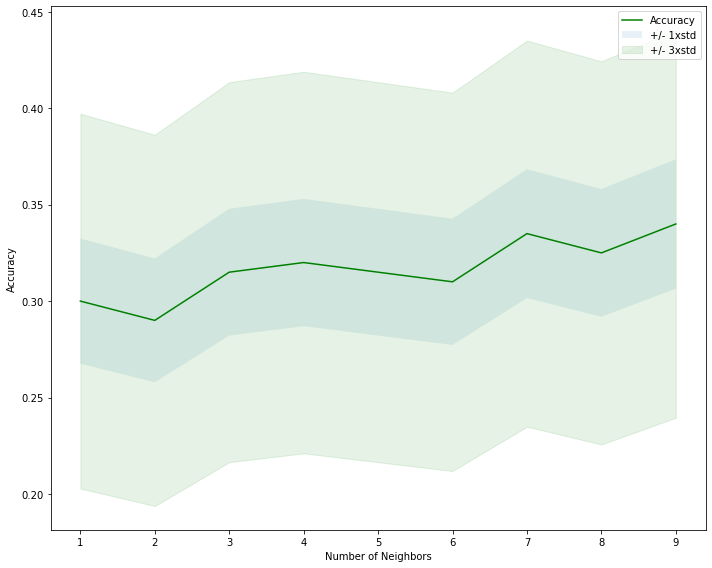

In [90]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1,ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1,ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

In [91]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9
